# DATA ANALYSIS
In this notebook we conduct our formal analysis using data from our exploration notebook.

In [15]:
# Dependencies and set-up
import pandas as pd
import requests
import json
from config import api_key
from pprint import pprint
from datetime import date
from matplotlib import pyplot as plt
import numpy as np
import gmaps
from config import g_key
import scipy.stats as stats
from datetime import date
from scipy.stats import linregress

## COMPARE US STATE INFECTION RATES TO THE NATIONAL AVERAGE
In this section we first look to see if states are experiencing covid-19 infections at a significantly different rate than the national average. We then look at the top ten states by total case number and seek to draw insights about those states.

In [16]:
# Import .csv of covid-19 data that we created in main.ipynb
covid_pop_data = pd.read_csv('Resources/covid_pop.csv')
# Create dataframe from imported data
covid_pop_df = pd.DataFrame(covid_pop_data)
covid_pop_df

,State,Population,Confirmed Cases,Deaths,"Cases Per 100,000","Deaths Per 100,000",Death Rate
0,Alabama,4903185,4345,133,88.615869,2.712523,0.030610
1,Alaska,731545,300,9,41.009097,1.230273,0.030000
2,Arizona,7278717,4237,150,58.210808,2.060803,0.035402
3,Arkansas,3017804,1620,37,53.681419,1.226057,0.022840
4,California,39512223,27677,957,70.046679,2.422035,0.034577
5,Colorado,5758736,8286,355,143.885742,6.164547,0.042843
6,Connecticut,3565287,15884,971,445.518131,27.234834,0.061131
7,Delaware,973764,2070,55,212.577175,5.648186,0.026570
8,Florida,21477737,23343,668,108.684635,3.110197,0.028617
9,Georgia,10617423,15669,587,147.578184,5.528649,0.037463


### Chi-squared analysis for difference in infection rates between US states and the national average

In [17]:
# Test whether the number of cases per state is different than the national average using a Chi-squared analysis

# Store our observed vs. expected values
observed = covid_pop_df['Confirmed Cases']
expected = (covid_pop_df['Population']/covid_pop_df['Population'].sum())*covid_pop_df['Confirmed Cases'].sum()

# Dataframe of observed and expected values
df = pd.DataFrame({
    'Observed': observed,
    'Expected': expected})
df
critical_value = stats.chi2.ppf(q = 0.95, df = 49)
chi_squared = stats.chisquare(df['Observed'], df['Expected'])
critical_value

if chi_squared[0] > critical_value:
    print(f'''
    The Chi-squared test statistic ({chi_squared[0]}) is greater than the critical value ({critical_value})
    We reject the null hypothesis
    ''')
else:
    print(f'''
    The Chi-squared test statistic ({chi_squared[0]}) is not greater than the critical value ({critical_value})
    We fail to reject the null hypothesis
    ''')


    The Chi-squared test statistic (1287108.3389150198) is greater than the critical value (66.3386488629688)
    We reject the null hypothesis
    


### Chi-squared results
Our chi-squared test-statistic was larger than the critical value and so we can reject the null hypothesis that there is no difference in infection rates between states. While this test tells us that the difference between the number of cases per state and their expected values is unlikely to be caused by chance alone, it does not offer additional insight as to why this difference occurred.

### Top ten states

Now that we have determined that there is a significant difference between US states and the national average we want to investigate the top ten states by total number of confirmed cases and total number of deaths. 

In [34]:
# Sort the dataframe by different metrics and store the results

#Sort dataframe by number of cases
by_case_num = covid_pop_df.sort_values('Confirmed Cases', ascending=False).reset_index(drop=True)
# Top 10 states by number of cases
top_cases = by_case_num.head(10)

#Sort dataframe by cases per capita
by_case_per = covid_pop_df.sort_values('Cases Per 100,000', ascending=False).reset_index(drop=True)
# Top 10 states by cases per 100,000 residents
top_cases_per = by_case_per.head(10)

#Sort dataframe by number of deaths
by_death_num = covid_pop_df.sort_values('Deaths', ascending=False).reset_index(drop=True)
# Top 10 states by number of deaths
top_deaths = by_death_num.head(10)

#Sort dataframe by deaths per capita
by_death_per = covid_pop_df.sort_values('Deaths Per 100,000', ascending=False).reset_index(drop=True)
# Top 10 States by deaths per 100,000 residents
top_deaths_per = by_death_per.head(10)

# Sort dataframe by death rate
by_death_rate = covid_pop_df.sort_values(by='Death Rate', ascending=False)
# Top 10 States by deaths rate
top_death_rate = by_death_rate.head(10)

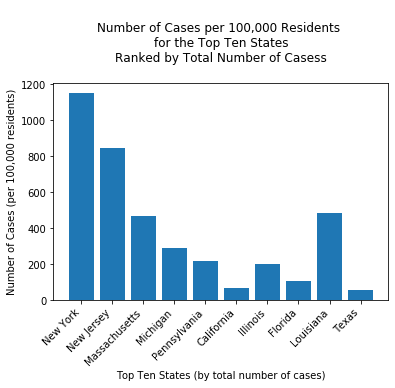

In [36]:
# Plot the number of cases per 100,000 for each of the top ten states based on total case case number
plt.bar(top_cases['State'], top_cases['Cases Per 100,000'])

# Format x-tick label
plt.xticks(ha='right', rotation=45)

# Axis labels
plt.xlabel('Top Ten States (by total number of cases)')
plt.ylabel('Number of Cases (per 100,000 residents)')
plt.title('''
Number of Cases per 100,000 Residents 
for the Top Ten States
Ranked by Total Number of Casess
''')
# Export plot as .png
plt.savefig('output_data/top_cases.png', bbox_inches='tight')

plt.show()

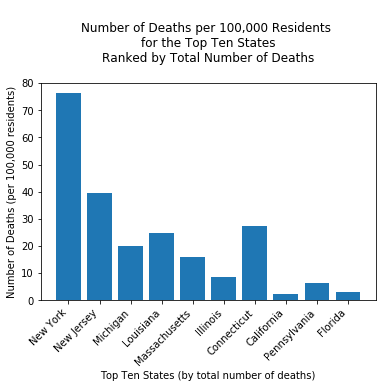

In [35]:
# Plot the number of deaths per 100,000 residents for each of the top ten states based on total death number
plt.bar(top_deaths['State'], top_deaths['Deaths Per 100,000'])

# Format x-tick label
plt.xticks(ha='right', rotation=45)

# Axis labels
plt.xlabel('Top Ten States (by total number of deaths)')
plt.ylabel('Number of Deaths (per 100,000 residents)')
plt.title('''
Number of Deaths per 100,000 Residents 
for the Top Ten States
Ranked by Total Number of Deaths
''')

# Export plot as .png
plt.savefig('output_data/top_deaths.png', bbox_inches='tight')

plt.show()

## COMPARE CALIFORNIA TO THE REST OF THE NATION

In this portion of our analysis we compare the state of California to the rest of the nation in order to determine whether we as a state are doing better, worse than, or equal to the rest of the nation. 

In [18]:
# Import the time series data for California vs. the rest of the nation from main.ipynb
cali_national_data = pd.read_csv('Resources/cali_national.csv', index_col=0)

# Dataframe of .csv data
cali_national_df = pd.DataFrame(cali_national_data)



In [19]:
# Store the total us population count
total_population = covid_pop_df['Population'].sum()

# Store Californias population count
cali_population = covid_pop_df.loc[covid_pop_df['State'] == 'California', 'Population'].sum()

# Dataframe of daily percent change in cases for USA, California and (USA-California)
percent_change = cali_national_df.pct_change()

# Add column for the difference between california and the rest of the nation
percent_change['Difference'] = abs((percent_change['Rest of Nation'] - percent_change['California']))

# Dataframe of daily change in cases for USA, California and (USA-California)
daily_diff = cali_national_df.diff()

cali_national_df['Natl Pop'] = total_population
cali_national_df['Cal Pop'] = cali_population
cali_national_df['Rest Pop'] = total_population - cali_population
cali_national_df['Natl Per'] = cali_national_df['National']/cali_national_df['Natl Pop']
cali_national_df['Cal Per'] = cali_national_df['California']/cali_national_df['Cal Pop']
cali_national_df['Rest Per'] = cali_national_df['Rest of Nation']/cali_national_df['Rest Pop']




# Store the current date
todays_date = date.today().strftime('%m/%d/%y')
cali_national_df

,National,California,Rest of Nation,Natl Pop,Cal Pop,Rest Pop,Natl Per,Cal Per,Rest Per
1/22/20,1,0,1,327533774,39512223,288021551,3.053120e-09,0.000000e+00,3.471962e-09
1/23/20,1,0,1,327533774,39512223,288021551,3.053120e-09,0.000000e+00,3.471962e-09
1/24/20,2,0,2,327533774,39512223,288021551,6.106241e-09,0.000000e+00,6.943925e-09
1/25/20,2,0,2,327533774,39512223,288021551,6.106241e-09,0.000000e+00,6.943925e-09
1/26/20,5,2,3,327533774,39512223,288021551,1.526560e-08,5.061725e-08,1.041589e-08
...,...,...,...,...,...,...,...,...,...
4/11/20,526396,21706,504690,327533774,39512223,288021551,1.607150e-03,5.493490e-04,1.752265e-03
4/12/20,555313,22795,532518,327533774,39512223,288021551,1.695437e-03,5.769101e-04,1.848882e-03
4/13/20,580619,23931,556688,327533774,39512223,288021551,1.772700e-03,6.056607e-04,1.932800e-03
4/14/20,607670,25356,582314,327533774,39512223,288021551,1.855290e-03,6.417255e-04,2.021772e-03


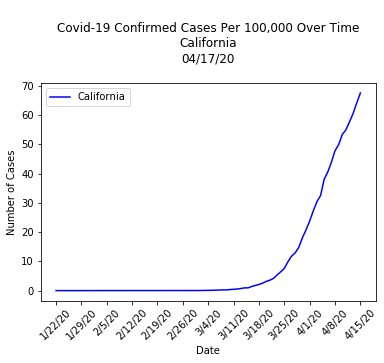

In [20]:
# Plot a time series of the number of cases per 100,000 for California
cali_line = plt.plot(cali_national_df['Cal Per']*100000, label='California', color='blue')
# Format xticks 
plt.xticks(ticks = range(0, len(cali_national_df), 7), rotation=45)

# Plot title, legend and axis labels
plt.title(f"""
Covid-19 Confirmed Cases Per 100,000 Over Time
California
{todays_date}
""")
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()

# Export the plot as .png
plt.savefig('output_data/cal_cases_time', bbox_inches='tight')

plt.show()

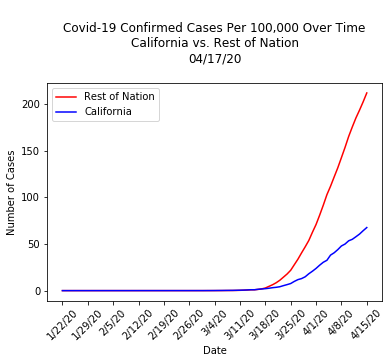

In [21]:
# Plot a time series of the number of cases per 100,000 for California vs the rest of the nation
rest_of_line = plt.plot(cali_national_df['Rest Per']*100000, label='Rest of Nation', color='red')
cali_line = plt.plot(cali_national_df['Cal Per']*100000, label='California', color='blue')

# Format xticks 
plt.xticks(ticks = range(0, len(cali_national_df), 7), rotation=45)

# Plot title, legend and axis labels
plt.title(f"""
Covid-19 Confirmed Cases Per 100,000 Over Time
California vs. Rest of Nation
{todays_date}
""")
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()

# Export the plot as .png
plt.savefig('output_data/cal_nation_cases', bbox_inches='tight')

# Display plot
plt.show()

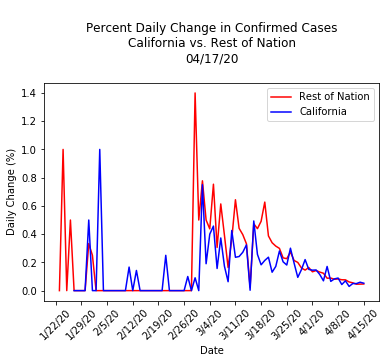

In [22]:
# Plot a time series of the percent daily change in total cases for California vs the rest of the nation
rest_of_line = plt.plot(percent_change['Rest of Nation'], label='Rest of Nation', color='red')
cali_change_line = plt.plot(percent_change['California'], label='California', color='blue')


# Format xticks 
plt.xticks(ticks = range(0, len(cali_national_df), 7), rotation=45)

# Plot title, legend and axis labels
plt.title(f"""
Percent Daily Change in Confirmed Cases
California vs. Rest of Nation
{todays_date}
""")
plt.xlabel('Date')
plt.ylabel('Daily Change (%)')
plt.legend()

# Export the plot as .png
plt.savefig('output_data/cal_nation_percent', bbox_inches='tight')

# Display plot
plt.show()

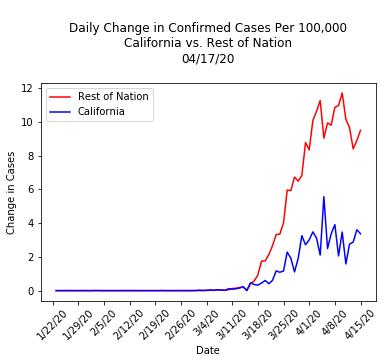

In [23]:
# Plot a time series of the daily change in total cases per 100,000 for California vs the rest of the nation
rest_diff_line = plt.plot(daily_diff['Rest of Nation']/(total_population-cali_population)*100000, label = 'Rest of Nation', color='red')
cali_diff_line = plt.plot(daily_diff['California']/cali_population*100000, label = 'California', color='blue')

# Format xticks 
plt.xticks(ticks = range(0, len(cali_national_df), 7), rotation=45)

# Plot title, legend and axis labels
plt.title(f"""
Daily Change in Confirmed Cases Per 100,000
California vs. Rest of Nation
{todays_date}
""")
plt.xlabel('Date')
plt.ylabel('Change in Cases')
plt.legend()

# Export the plot as .png
plt.savefig('output_data/cal_nation_diff', bbox_inches='tight')

# Display plot
plt.show()



### Linear regression for difference in daily new cases per 100,000 for California vs. the rest of the nation

In [24]:
#Function to create a linear regression model and plot the model over a scatter plot
def lin_regress(x_vals, y_vals, x_lab, y_lab, xy):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals, regress_values,"r-")
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.xlabel(f"{x_lab}")
    plt.ylabel(f"{y_lab}")
    
    print(f"The r-squared is: {rvalue}")
    

The r-squared is: 0.93147366312131


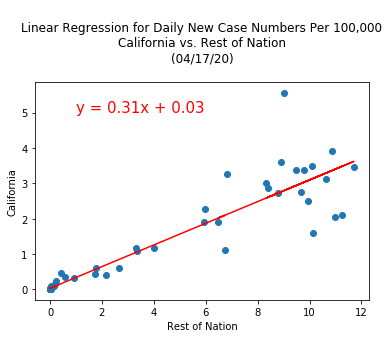

In [28]:
# Linear regression of Californias daily new case numbers vs the rest of the nation
lin_regress((daily_diff['Rest of Nation']/(total_population-cali_population)*100000)[1:],
            (daily_diff['California']/cali_population*100000)[1:],
            'Rest of Nation',
            'California',
            (1, 5))
plt.title(f"""
Linear Regression for Daily New Case Numbers Per 100,000
California vs. Rest of Nation
({todays_date})
""")
# Export the regression plot as a .png
plt.savefig('output_data/cali_national_lin_regress', bbox_inches='tight')

plt.show()

### Linear Regression Results
From the linear regression above we can see that there is a strong positive correlation between the daily number of new cases for California and the rest of the nation. Using this model we predict that California's cases will follow the trend of the rest of the nation. Knowing that the two variables are correlated, we now want to see investigate whether the apparent difference in in case numbers per day is statistically significant. 

### T-test for difference in daily new cases per 100,000 for California vs the rest of the nation

In [26]:
# Test for statistical difference between California and the rest of the nation for daily changes in confirmed cases per capita

t_test = stats.ttest_ind((daily_diff['California']/cali_population)[1:], 
                         (daily_diff['Rest of Nation']/(total_population-cali_population))[1:], equal_var=False)
# Store the p-value
p_value = t_test[1]

# Check if the p-value is below our level of significance and print message accordingly
if p_value < 0.05:
    print(f'P-value: {p_value}. We reject the null hypothesis.')
else:
    print(f'P-value: {p_value}. We are unable to reject the null hypothesis.')

P-value: 0.0002764477093407667. We reject the null hypothesis.


In [32]:
#Test for statistical difference between California and the rest of the nation for number of confirmed cases per capita
t_test = stats.ttest_ind(cali_national_df['Cal Per'], cali_national_df['Rest Per'], equal_var=False)
# Store the p-value
p_value = t_test[1]

# Check if the p-value is below our level of significance and print message accordingly
if p_value < 0.05:
    print(f'P-value: {p_value}. We reject the null hypothesis.')
else:
    print(f'P-value: {p_value}. We are unable to reject the null hypothesis.')

P-value: 0.0031533715146780587. We reject the null hypothesis.


### T-test 1 results
After conducting the first t-test above, we are able to reject the null hypothesis that there is no significant difference between the daily number of new cases for California vs. the rest of the nation. Using these test results combined with the linear regression model created above, we determine that California's number of new cases per day is positively correlated with the rest of the nation but the number of new cases per day is significantly less than the rest of the nation.

One possible conclusion that could be drawn from these results is that California is experiencing the same general trend for daily new Covid-19 cases as the rest of the nation, but the severity of our infection rate is lower than the rest of the nation. This shows that California is doing better than the nation as a whole in terms of infection rate, but does not tell us about the reason for the difference. 

### T-test 2 results
After conducting the second t-test above, we are able to reject the null hypothesis that there is no significant difference between the number of confirmed cases for California vs. the rest of the nation.

From this test-result we determine that California has a significantly different number of confirmed cases than the rest of the nation. Because California's number of cases per capita is lower than, and significantly different than the rest of of the nation we can conclude that California is experiencing Covid-19 infections at a lower rate than the rest of the nation. 

### Takeaway: 
California is experiencing lower infection rates than the rest of the nation but we do not have enough information to explain why that is happening. 